<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimersDetection4class_RESNEXT50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"2c0e73f0e1cea2d8f9e56fba987e2376"}'}

In [4]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images


 73% 25.0M/34.1M [00:00<00:00, 65.6MB/s]
100% 34.1M/34.1M [00:00<00:00, 82.1MB/s]


In [6]:
from zipfile import ZipFile
file_name="alzheimers-dataset-4-class-of-images.zip"

In [7]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [8]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 8.1 MB/s 
     |████████████████████████████████| 4.4 MB 57.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.2 MB/s 
     |████████████████████████████████| 362 kB 76.7 MB/s 
     |████████████████████████████████| 1.1 MB 60.1 MB/s 
     |████████████████████████████████| 140 kB 75.0 MB/s 
     |████████████████████████████████| 212 kB 60.4 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
     |████████████████████████████████| 596 kB 73.2 MB/s 
     |████████████████████████████████| 127 kB 77.9 MB/s 
     |████████████████████████████████| 144 kB 76.2 MB/s 
     |████████████████████████████████| 271 kB 70.1 MB/s 
     |████████████████████████████████| 94 kB 333 kB/s 
     |████████████████████████████████| 6.6 MB 52.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6

In [9]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL

In [10]:
train_dspath=Path("/content/Alzheimer_s Dataset/train")
train_dspath.ls()

(#4) [Path('/content/Alzheimer_s Dataset/train/ModerateDemented'),Path('/content/Alzheimer_s Dataset/train/NonDemented'),Path('/content/Alzheimer_s Dataset/train/VeryMildDemented'),Path('/content/Alzheimer_s Dataset/train/MildDemented')]

In [11]:
train_imfiles=get_image_files(train_dspath)

In [12]:
im=PILImage.create(train_imfiles[0])
im.shape

(208, 176)

In [13]:
augments=[RandomResizedCrop(size=224, min_scale=0.75), Rotate(), Zoom()]
item_tfms=Resize(128,method='squish')

In [14]:
brains=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=parent_label,
                 batch_tfms=augments,
                 item_tfms=item_tfms,
                 splitter=RandomSplitter(valid_pct=0.2,seed=23)
                 
                 
                 )

In [15]:
dls=brains.dataloaders(train_imfiles,bs=64)

In [16]:
dls.c,len(dls.train_ds),len(dls.valid_ds)#valid ve train data sayımız

(4, 4097, 1024)

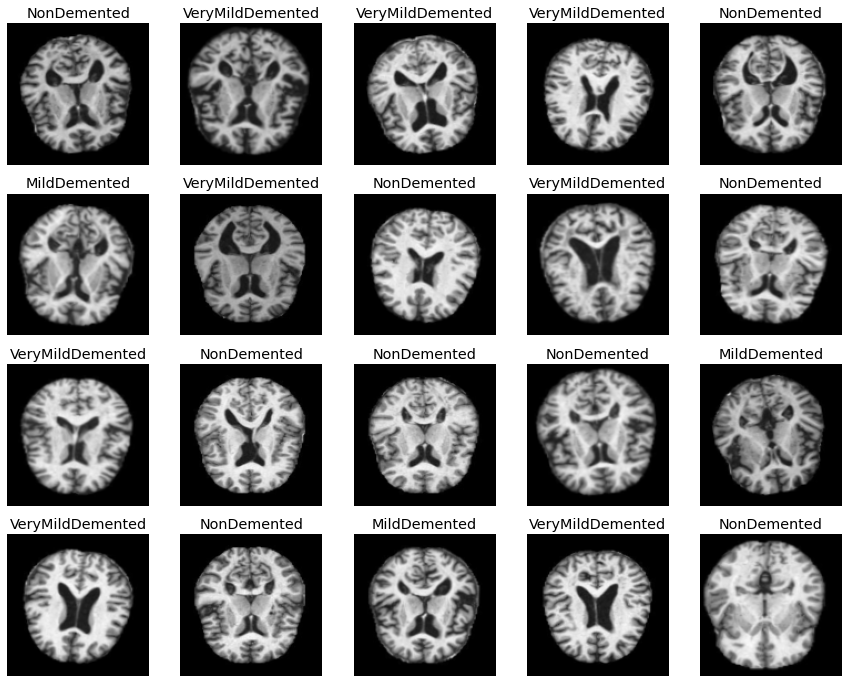

In [17]:
dls.show_batch(max_n=20)

In [40]:
from torchvision.models.resnet import resnext50_32x4d
learn=cnn_learner(dls,resnext50_32x4d,pretrained = True,metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.0020892962347716093)

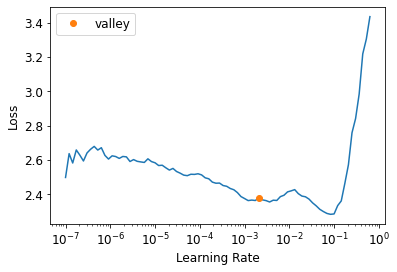

In [19]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(100,2.e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.005768,1.442864,0.472656,0.527344,00:20
1,1.834379,1.285716,0.521484,0.478516,00:20
2,1.667650,1.181660,0.585938,0.414062,00:21
3,1.561574,1.145684,0.580078,0.419922,00:21
4,1.426685,0.983180,0.637695,0.362305,00:21
5,1.302698,0.982323,0.620117,0.379883,00:21
6,1.152883,0.861016,0.656250,0.343750,00:21
7,1.020387,0.779435,0.694336,0.305664,00:21
8,0.893545,0.765302,0.708008,0.291992,00:21
9,0.770487,0.667313,0.754883,0.245117,00:21


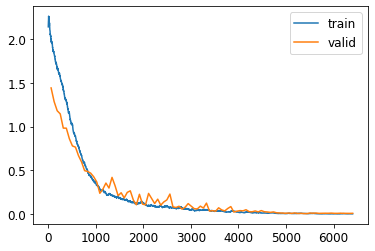

In [22]:
learn.recorder.plot_loss()

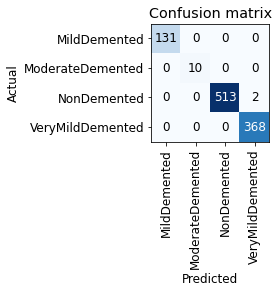

In [23]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

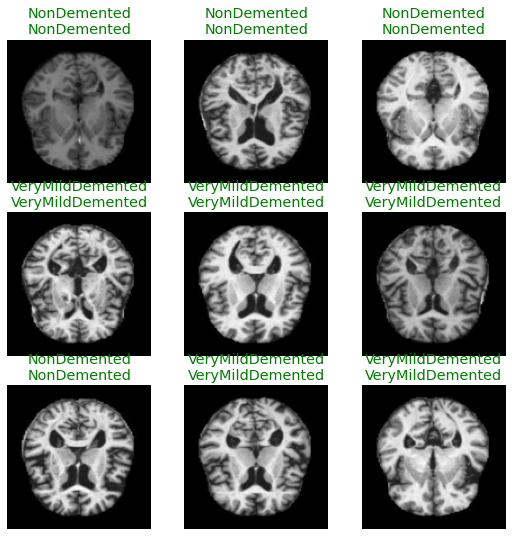

In [24]:
learn.show_results()

In [25]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 32 x 32  
Conv2d                                    8192       False     
BatchNorm2d                               256        True      
Conv2d                                    4608       False     
BatchNorm2d                               256        True      
____________________________________________________________________________
                     6

In [26]:
interp.print_classification_report()

                  precision    recall  f1-score   support

    MildDemented       1.00      1.00      1.00       131
ModerateDemented       1.00      1.00      1.00        10
     NonDemented       1.00      1.00      1.00       515
VeryMildDemented       0.99      1.00      1.00       368

        accuracy                           1.00      1024
       macro avg       1.00      1.00      1.00      1024
    weighted avg       1.00      1.00      1.00      1024



In [27]:
from fastai.vision.widgets import * 
from fastai.vision.all import *
from PIL import Image, ImageOps, ImageEnhance, __version__ as PILLOW_VERSION

In [28]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

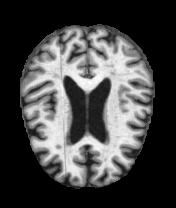

In [35]:
img=PILImage.create(btn_upload.data[-1])
img

In [36]:
learn.predict(img)[0]

'VeryMildDemented'

In [41]:
learn.unfreeze()

SuggestedLRs(valley=0.001737800776027143)

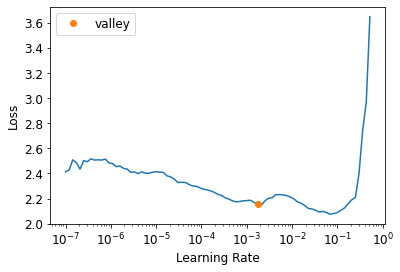

In [42]:
learn.lr_find()

In [45]:
learn.fine_tune(30,base_lr=2.2e-3,freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.340860,0.412219,0.834961,0.165039,00:21


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.334458,0.323533,0.865234,0.134766,00:38
1,0.289896,0.309245,0.881836,0.118164,00:37
2,0.251399,0.294855,0.876953,0.123047,00:38
3,0.244035,0.273189,0.892578,0.107422,00:38
4,0.227774,0.255394,0.895508,0.104492,00:38
5,0.225845,0.262591,0.898438,0.101562,00:38
6,0.205450,0.238227,0.910156,0.089844,00:38
7,0.193597,0.210272,0.920898,0.079102,00:37
8,0.174446,0.193197,0.930664,0.069336,00:38
9,0.145969,0.164046,0.944336,0.055664,00:37


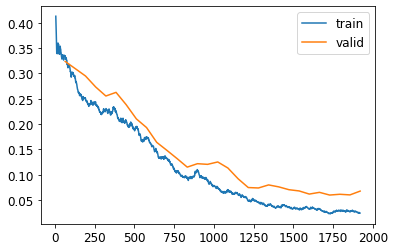

In [47]:
learn.recorder.plot_loss()